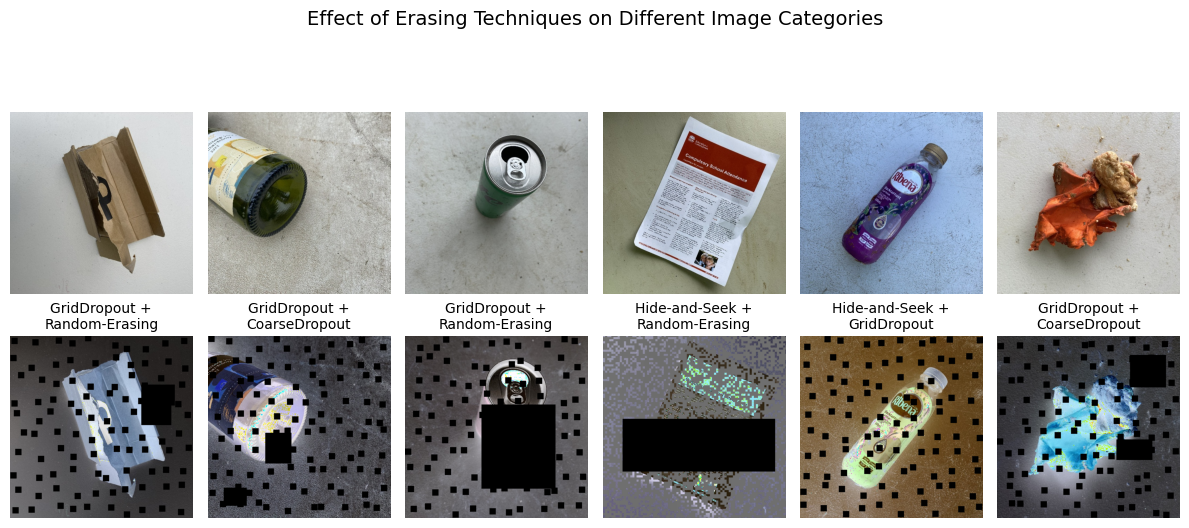

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_original_and_augmented(base_folder, categories, output_filename="comparison.png", figsize=(12, 6)):
    """
    Displays one row of original images and one row of augmented images,
    labeling each column with a category name instead of filenames,
    and saves the figure as an image file.

    Parameters:
      base_folder: Path to the parent directory (e.g., 'dataset_balanced_plot').
      categories: List of tuples: (subfolder, original_filename, augmented_filename, label)
                  - subfolder: category folder name (e.g., "plastic")
                  - original_filename: e.g. "Plastic_9_original.jpg"
                  - augmented_filename: e.g. "Plastic_9_aug_27.png"
                  - label: short text to display (e.g. "Plastic", "Paper", "Metal")
      output_filename: The name (and optional path) of the saved figure file.
      figsize: Size of the entire figure in inches (width, height).
    """
    num_cats = len(categories)
    fig, axes = plt.subplots(nrows=2, ncols=num_cats, figsize=figsize)

    for col, (subfolder, orig_file, aug_file, label) in enumerate(categories):
        # Build full paths
        orig_path = os.path.join(base_folder, subfolder, orig_file)
        aug_path  = os.path.join(base_folder, subfolder, aug_file)

        # Read images
        orig_img = mpimg.imread(orig_path)
        aug_img  = mpimg.imread(aug_path)

        # Top row: original image
        axes[0, col].imshow(orig_img)
        axes[0, col].axis("off")

        # Bottom row: augmented image
        axes[1, col].imshow(aug_img)
        axes[1, col].axis("off")

        # Use the category label for the bottom row title
        axes[1, col].set_title(label.replace(" + ", "\n"), fontsize=10, wrap=True)

    # Add an overall figure title
    fig.suptitle("Effect of Erasing Techniques on Different Image Categories", fontsize=14)

    # Adjust layout to avoid overlapping text
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leaves space for title and bottom labels

    # Save the figure
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')

    # Optionally display the plot
    plt.show()


if __name__ == "__main__":
    base_folder = "../data/dataset_erasing_plot"

    # (subfolder, original_filename, augmented_filename, label)
    categories = [
        ("cardboard", "Cardboard_5.jpg",              "Cardboard_5_aug_409.png",  "Random-Erasing"),
        ("glass",     "Glass_2.jpg",           "Glass_2_aug_382.png",      "Hide-and-Seek"),
        ("metal",     "Metal_136.jpg",           "Metal_136_aug_176.png",       "GridDropout"),
        ("paper",     "Paper_34.jpg",           "Paper_34_aug_52.png",       "CoarseDropout"),
        ("plastic",   "Plastic_25.jpg",         "Plastic_25_aug_601.png",      "Random-Erasing + \nCoarseDropout+ \nGridDropout"),
        ("trash",     "Miscellaneous Trash_77.jpg",
                      "Miscellaneous Trash_77_aug_695.png", "Random-Erasing + \nHide-and-Seek +\nCoarseDropout + \nGridDropout")
    ]

    plot_original_and_augmented(
        base_folder, 
        categories, 
        output_filename="comparison_erasing.png"
    )
